# ESD 40.317 Financial Systems Design 
## Part 2 Assignment 2
### Due: 19 July before midnight 

Do not change any of the function definitions or variable names that are given in the cells for you to provide the solution. These function and variable names are used to autograde your solution and changing them might cause the autograder to fail and hence award 0 marks.

### Question 1: Method of Undetermined Coefficients

Using the method of undetermined coefficients, show the following: 

$$
f'''(x)\approx \frac{1}{h^3}[af(x+2h)+bf(x+h)+cf(x)+df(x-h)+ef(x-2h)]
$$

where $a=\frac{1}{2}, b=-1, c=0, d=1, e=-\frac{1}{2}$    

(20 marks)

Hint: expand the Taylor's series of the f(x+ih) terms around the point x to the forth derivative i.e. $f''''(x)$

YOUR ANSWER HERE

First, we sub in the coefficients for a, b, c, d, and e and obtain the following:
$$
f'''(x)\approx \frac{1}{h^3}[\frac{1}{2}f(x+2h)-f(x+h)+f(x-h)-\frac{1}{2}f(x-2h)]
$$

Next, applying Taylor's Theorem, we expand $\frac{1}{2}f(x+2h)-f(x+h)+f(x-h)-\frac{1}{2}f(x-2h)$ to the fourth derivative to obtain the following:
$$
\frac{1}{2}f(x+2h) = \frac{1}{2}[f(x) + 2hf'(x) + \frac{4h^2}{2}f''(x) + \frac{8h^3}{6}f'''(x) + \frac{16h^4}{24}f''''(x) + ...]
$$
$$
-f(x+h) = -[f(x) + hf'(x) + \frac{h^2}{2}f''(x) + \frac{h^3}{6}f'''(x) + \frac{h^4}{24}f''''(x) + ... ]
$$
$$
f(x-h) = [f(x) - hf'(x) + \frac{h^2}{2}f''(x) - \frac{h^3}{6}f'''(x) + \frac{h^4}{24}f''''(x) - ... ]
$$
$$
-\frac{1}{2}f(x-2h) = -\frac{1}{2}[f(x) - 2hf'(x) + \frac{4h^2}{2}f''(x) - \frac{8h^3}{6}f'''(x) + \frac{16h^4}{24}f''''(x) - ...]
$$

Summing the 4 expressions above, we obtain the following: 
$$
\frac{1}{2}f(x+2h)-f(x+h)+f(x-h)-\frac{1}{2}f(x-2h) \approx h^3f'''(x)
$$

Therefore, $$\frac{1}{h^3}[\frac{1}{2}f(x+2h)-f(x+h)+f(x-h)-\frac{1}{2}f(x-2h)] \approx f'''(x) $$
(shown)

We will try to determine the order of accuracy of this differencing scheme by finding the errors for the function $f(x)=xe^{x}$. Implement the following:
1. Fill in the code for the function **f(x)** which calculates the value of $f(x)$.
2. Fill in the code for the function **central_diff(x)** which approximates the value of the $f'''(x)$ using the differencing scheme you have derived above.
3. Calculate the actual value of the $f'''(0.5)$ using the following formula a:$f'''(x)=(x+3)e^x$
4. Using the value calculated in 3), find the error of the approximated value using **central_diff** at $x=0.5$ for $h=0.1$, $0.01$ and $0.001$ and assigning the values to **error1**, **error2** and **error3** respectively. The error should be calculated as central_diff(0.5) - $f'''(0.5)$.
5. Finally, calculate the ratio of the error between $h=0.1$ and $0.01$ (i.e. $\frac{error1}{error2}$) and assigning it to **ratio1** and also the ratio between $0.01$ and $0.001$ assigning it to **ratio2**

(10 marks)

In [3]:
import math

def f(x):
    return x*math.exp(x)# ADD CODE HERE

def central_diff(f, x, h):
    return 1/(h**3)*(0.5*f(x+2*h)-f(x+h)+f(x-h)-0.5*f(x-2*h))# ADD CODE HERE

x = 0.5
actual_value = (x+3)*math.exp(x) # ADD CODE HERE
error1 = central_diff(f, x, 0.1) - actual_value # ADD CODE HERE
error2 = central_diff(f, x, 0.01) - actual_value # ADD CODE HERE
error3 = central_diff(f, x, 0.001) - actual_value # ADD CODE HERE
ratio1 = error1/error2 # ADD CODE HERE
ratio2 = error2/error3 # ADD CODE HERE
# print(error1)
# print(error2)
# print(error3)
# print("ratio1 is: ", ratio1)
# print('ratio2 is: ', ratio2)
# print(round(ratio1, -2))
# print(round(ratio2, -2))

In [4]:
assert math.fabs(error1 - 0.0227) < 5e-5
assert math.fabs(error2 - 0.0002267) < 5e-8
assert math.fabs(error3 - 2.2755e-06) < 5e-10
assert round(ratio1, -2) == 100
assert round(ratio2, -2) == 100

### Question 2: Solving ODE using Runge Kutta 2 with Richardson Extrapolation

Given the derivative function $y'(t)=e^t+y$ and $y(0)=0$, find the value of $\hat{y}(2)$ using $\Delta t=0.2, 0.1, 0.05$ with Runge Kutta 2:

$$
k_1=\Delta tf(t,\hat{y}_t) \\
k_2=\Delta tf(t+\Delta t,\hat{y}_t+k_1) \\
\hat{y}_{t+\Delta t}=\hat{y}_t+\frac{1}{2}(k_1+k_2) \\
$$

Apply Richardson Extrapolation to obtain a better approximation for $\hat{y}(2)$ using the values $\hat{y}_{\Delta t=0.2}(2)$ and $\hat{y}_{\Delta t=0.1}(2)$ i.e. the values approximated for $y(2)$ using RK2 with $\Delta t=0.2, 0.1$. 

Using $y(t)=te^t$ as the exact solution, find the **absolute** errors of the approximation obtained for $y(2)$ and store them in the dictionary variable **errors**. The key for the error will be the value of $\Delta t$ e.g. **errors\[0.2\]** should give the value of $|y(2)-\hat{y}_{\Delta t=0.2}(2)|$. For the Richardson Extrapolation absolute error, store in the dictionary with the key 'RE' i.e. **errors\['RE'\]** should return the absolute error for the Richardson extrapolation approximation.

Complete the code for the following function defintions provided in the cells below then use the functions to compute the required values. The function definitions are explained below:
1. **yprime(t, y)** is used to calculate the derivative $y'(t)$ given t and y
2. **y(t)** is used to calculate the exact values of the function $y(t)$
3. **rk2(f, ts, Δt, t_min, y_t_min)** takes in the following arguments and outputs a numpy array containing the approximated values $\hat{y}(t)$ from $t=0$ to $t=2$ based on step size of $\Delta t$:
    1. **f** is a function that calculates the derivative fiven t and y
    2. **ts** is a numpy array that provides all the points on t axis from $t=0$ to $t=2$ given $\Delta t$
    3. **Δt** is the size of the interval
    4. **t_min** is the starting point on the t axis i.e. 0
    5. **y_t_min** is the value of $y(t)$ at the starting point i.e. initial condition

(30 marks)

Hint: Runge Kutta 2 is of 2nd order accuracy so $n=2$ in the combined equation of the two approximations as seen in the lecture slides:     

$$
\hat{G}=\frac{(\frac{h_1}{h_2})^{n}g(h_2)-g(h_1)}{(\frac{h_1}{h_2})^{n}-1}
$$

In [3]:
import math
import numpy as np

def yprime(t, y):
    return np.exp(t) + y # ADD CODE HERE

def y(t):
    return t*np.exp(t) # ADD CODE HERE

def rk2(f, ts, Δt, t_min, y_t_min):
    Nt = len(ts) # obtains the number of points 
    ys = np.zeros(Nt) # initialise an array of 0s to store the output
    ys[0] = y_t_min # set the min y value
    for i in range(1, Nt):
        k1 = Δt * f(ts[i-1], ys[i-1])
        k2 = Δt * f(ts[i], ys[i-1]+k1)
        ys[i] = ys[i-1] + 0.5 * (k1+k2)
    return ys

t_min = 0.; t_max = 2.; y_t_min = 0

y_t_max = y(t_max)  # exact value of y(2)
errors = {}         # dictionary to store the errors
ys_rk2 = {} # create a dictionary to store the ys values for richardson extrapolation
ts_rk2 = {} # create a dictionary to store the x values for each step

for Δt in [0.2, 0.1, 0.05]:
    ts = np.linspace(t_min, t_max, int((t_max - t_min) / Δt) + 1)
    ys = rk2(yprime, ts, Δt, t_min, y_t_min) 
    ts_rk2[Δt] = ts
    ys_rk2[Δt] = ys
    y_exact = y(ts)
    errors[Δt] = abs(y_exact[-1] - ys[-1])
    
y_RE = (2**2*ys_rk2[0.1][::2] - ys_rk2[0.2])/(2**2-1)
errors['RE'] = abs(y(2) - y_RE[-1])
print(errors)
# if errors[0.1] - 0.0562135 < 5e-7:
#     print('pass test')
#     print(errors[0.1] - 0.0562135)

{0.2: 0.20495430829568306, 0.1: 0.056213396126773674, 0.05: 0.014712088061791917, 'RE': 0.00663309207046936}


In [4]:
assert math.fabs(errors[0.2] - 0.20495) < 5e-5
assert math.fabs(errors[0.1] - 0.0562135) < 5e-7
assert math.fabs(errors[0.05] - 0.0147120) < 5e-7

In [5]:
assert math.fabs(errors['RE'] - 0.0066330) < 5e-7

### Question 3: Solving 2nd order linear ODEs

Given the following 2nd order linear ODE boundary problem:

$$
-y(x)+3xy'(x)+2x^2y''(x)=0 \\
y(1)+y'(1)=\frac{3}{2} \\
y(4)+y'(4)=\frac{39}{16} \\
$$

Solve for $y(x)$ for $x$ in the interval \[1, 4\] with $\Delta x=0.001$ using the scipy solver **spsolve**. Store the results in the variable **y_estd**. 

For the boundary conditions, you are to use a higher order forward/backward differencing scheme as shown below:
1. First boundary condition with 2nd order forward differencing 

$$
g_1y_0 + g_2\frac{-y_2+4y_1-3y_0}{2\Delta x}=g_0 \\
(g_1-\frac{3}{2\Delta x}g_2)y_0+(\frac{2}{\Delta x}g_2)y_1-(\frac{1}{2\Delta x}g_2)y_2=g_0 \\
$$

2. Second boundary condition with 2nd order backward differencing   

$$
k_1y_n + k_2\frac{3y_n-4y_{n-1}+y_{n-2}}{2\Delta x}=k_0 \\
(\frac{1}{2\Delta x}k_2)y_{n-2}-(\frac{2}{\Delta x}k_2)y_{n-1}+(k_1+\frac{3}{2\Delta x}k_2)y_n=k_0
$$


Complete the code for the following function definitions to perform this task:
1. **gen_matrix** takes in the following arguments and returns a sparse matrix in [csr](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html) form:
    1. xs is the a numpy array that contains all the points in the required interval based on $\Delta x$
    2. f1, f2, f3, g0, g1, g2, k0, k1, k2 are the functions and values corresponding to the general form of the 2nd order linear ODE as seen on the lecture slide shown below.
2. **gen_solution** takes in the following arguments and returns a numpy array containing the approximated solution for x in the interval \[a,b\] with step size $\Delta x$:
    1. $\Delta x$ is the step size
    2. a, b, f0, f1, f2, f3, g0, g1, g2, k0, k1, k2 are the functions and values corresponding to the general form of the 2nd order linear ODE as seen on the lecture slide shown below.
    
Use the functions to compute **y_estd**.

(40 marks)

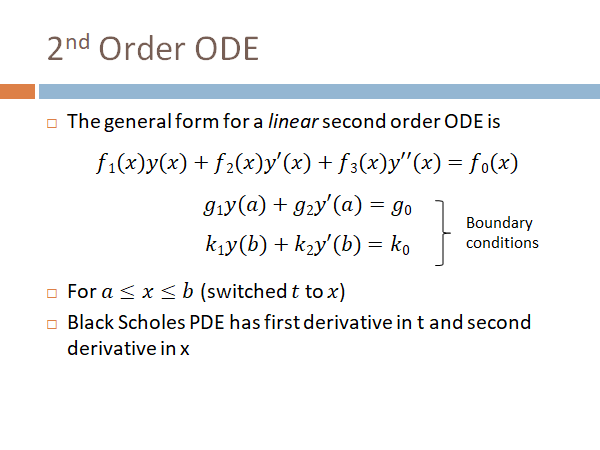

In [7]:
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve
import numpy as np

def gen_matrix(xs, f1, f2, f3, g0, g1, g2, k0, k1, k2):
    Δx = xs[1] - xs[0] 
    N = len(xs)     # N is the number of points which is number of intervals + 1 i.e. small n + 1
    
    # Set up matrix diagonals
    # ADD CODE HERE
    d0 = f1(xs) - 2.*f3(xs)/(Δx**2) # create first diag
    d1 = f2(xs[:-1])/(2.*Δx) + f3(xs[:-1])/(Δx**2) # create first super diag and drop the last term 
    dm1 = -f2(xs[1:])/(2.*Δx) + f3(xs[1:])/(Δx**2) # create first sub diag and drop the first term 
    d2 = np.zeros((N-2))
    dm2 = np.zeros((N-2))
        
    # First Boundary Condition
    # ADD CODE HERE
    d0[0] = g1 - 3.*g2/2./Δx
    d1[0] = 2.*g2/Δx
    d2[0] = -g2/2./Δx
    
    # Second Boundary Condition
    # ADD CODE HERE
    d0[-1] = k1 + 3.*k2/2./Δx  
    dm1[-1] = -2.*k2/Δx
    dm2[-1] = k2/2./Δx
    
    # Construct matrix
    A = diags([dm2,dm1,d0,d1,d2], [-2,-1, 0, 1, 2], shape=(N,N), dtype=float)
    A = A.tocsr() # Required format for spsolver

    return A

def gen_solution(Δx, a, b, f0, f1, f2, f3, g0, g1, g2, k0, k1, k2):    
    N = int((b-a)/Δx) + 1
    xs = np.linspace(a, b, N)
    A = gen_matrix(xs, f1, f2, f3, g0, g1, g2, k0, k1, k2)
    
    # Construct the RHS of the equation Ay = z which we will solve for y
    # ADD CODE HERE
    z = f0(xs)
#     print(type(z))
    z[0] = g0
    z[-1] = k0
    
    # Solve the equation Ay = z for y
    # ADD CODE HERE
    y = spsolve(A, z)
    
    return y 

def f0(x):
    # ADD CODE HERE
    return 0.*x # i do this so that this function returns an array instead of a float

def f1(x):
    # ADD CODE HERE
    return -1.*x/x # i do this so that this function returns as array instead of a float

def f2(x):
    # ADD CODE HERE
    return 3.*x

def f3(x):
    # ADD CODE HERE
    return 2.*(x**2)

# ADD CODE HERE
a = 1.; b = 4. # x-axis boundary values
g1 = 1.; g2 = 1.; g0 = 3/2
k1 = 1.; k2 = 1.; k0 = 39/16
Δx = 0.001
y_estd = gen_solution(Δx, a, b, f0, f1, f2, f3, g0, g1, g2, k0, k1, k2)
# print(len(y_estd))
# print(np.abs(y_estd - y_exact(xs)))
# print((np.abs(y_estd - y_exact(xs)) < 1e-4).all())

In [8]:
assert len(y_estd) == 3001

In [9]:
def y_exact(x):
    return x**0.5 + 1/x
xs = np.linspace(1, 4, 3001)

assert (np.abs(y_estd - y_exact(xs)) < 1e-4).all()

In [11]:
import matplotlib.pyplot as plt
x = np.linspace(a, b, 3001)
plt.plot(x, y_estd, x, y_exact(x))